In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [4]:
train = pd.read_csv('Dataset/sign_mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
X_train = train.drop('label', axis=1)
y_train = train['label']

In [6]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [7]:
y_train.head()

0     3
1     6
2     2
3     2
4    13
Name: label, dtype: int64

In [8]:
target_values = np.sort(y_train.unique())

<BarContainer object of 24 artists>

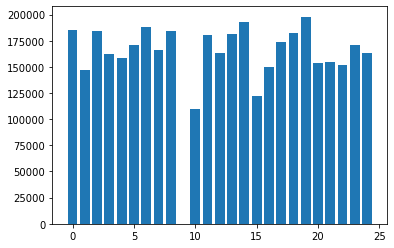

In [9]:
count_data = pd.DataFrame(train.groupby('label', axis=0).sum()).iloc[:,:1]
plt.bar(target_values, count_data.iloc[:,0])

In [10]:
count_data

,pixel1
label,
0,184881
1,146668
2,183909
3,162364
4,158693
5,171240
6,188464
7,166276
8,184173


In [11]:
X_train.iloc[0, :].shape[0]

784

In [12]:
X_train.shape

(27455, 784)

In [13]:
X_train = X_train.values
y_train = y_train.values

In [14]:
X_train.shape, y_train.shape

((27455, 784), (27455,))

In [15]:
img = X_train[0].reshape(28, 28)

In [16]:
img.shape

(28, 28)

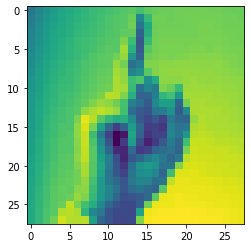

In [17]:
plt.imshow(img)

In [18]:
X_train = X_train.reshape(27455, 28, 28)

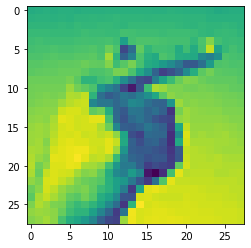

In [19]:
plt.imshow(X_train[52])

In [20]:
X_train[:5]

array([[[107, 118, 127, ..., 170, 170, 169],
        [111, 121, 129, ..., 171, 171, 170],
        [113, 123, 131, ..., 171, 171, 171],
        ...,
        [142, 150, 159, ..., 202, 201, 200],
        [142, 151, 160, ..., 204, 203, 202],
        [142, 151, 160, ..., 204, 203, 202]],

       [[155, 157, 156, ..., 138,  92, 108],
        [158, 159, 159, ..., 142, 116, 143],
        [161, 161, 161, ..., 147, 125, 140],
        ...,
        [162, 159, 145, ...,  91, 101,  94],
        [153, 139, 115, ...,  97,  95, 120],
        [135, 116,  95, ..., 103, 135, 149]],

       [[187, 188, 188, ...,  66,  77,  83],
        [188, 189, 189, ...,  73,  73,  71],
        [190, 190, 190, ...,  74,  68,  61],
        ...,
        [212, 198, 175, ..., 195, 193, 192],
        [202, 179, 152, ..., 195, 194, 193],
        [198, 166, 132, ..., 195, 194, 195]],

       [[211, 211, 212, ...,  51,  52,  54],
        [212, 213, 215, ...,  44,  49,  46],
        [215, 217, 218, ...,  52,  41,  45],
        ..

In [21]:
X_train[0].shape

(28, 28)

In [22]:
X_train_reshape = X_train.reshape((27455, 28, 28, 1))

In [23]:
X_train_reshape.shape

(27455, 28, 28, 1)

In [24]:
X_train_reshape[0].shape

(28, 28, 1)

In [25]:
np.max(X_train), np.min(X_train)

(255, 0)

In [26]:
X_train_norm = X_train_reshape / 255

In [128]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
#     tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 5408)              0         
                                                                 
 dense_27 (Dense)            (None, 1024)              5538816   
                                                                 
 dropout_9 (Dropout)         (None, 1024)              0         
                                                                 
 dense_28 (Dense)            (None, 2)                 2050      
                                                      

In [129]:
tf.random.set_seed(123)

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

with tf.device('/CPU:0'):
    model.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10


C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


InvalidArgumentError: Graph execution error:

Detected at node 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits' defined at (most recent call last):
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Dell\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\Dell\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\Dell\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Dell\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Dell\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\Dell\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Dell\AppData\Local\Temp\ipykernel_13200\3998662874.py", line 9, in <cell line: 8>
      model.fit(X_train_norm, y_train, epochs=10)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 890, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\training.py", line 948, in compute_loss
      return self.compiled_loss(
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\losses.py", line 139, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\losses.py", line 243, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\losses.py", line 1860, in sparse_categorical_crossentropy
      return backend.sparse_categorical_crossentropy(
    File "C:\Users\Dell\anaconda3\lib\site-packages\keras\backend.py", line 5238, in sparse_categorical_crossentropy
      res = tf.nn.sparse_softmax_cross_entropy_with_logits(
Node: 'sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits'
Received a label value of 24 which is outside the valid range of [0, 2).  Label values: 13 3 8 8 6 6 22 6 12 14 17 23 6 21 10 1 19 17 7 23 19 17 18 10 23 24 19 3 12 20 20 18
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_272469]

In [27]:
model.save('model1.h5')

In [28]:
with tf.device('/CPU:0'):
    prediction = (model.predict(X_train_reshape[7:8] / 255))

1/1 [==============================] - 0s 155ms/step


In [29]:
target_values[np.argmax(prediction)]

23

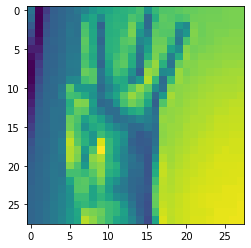

In [30]:
plt.imshow(X_train_reshape[7:8].squeeze())

In [31]:
y_train[7]

22

In [32]:
with tf.device('/CPU:0'):
    prediction = (model.predict(X_train_reshape[9:10] / 255))

target_values[np.argmax(prediction)]

1/1 [==============================] - 0s 82ms/step


3

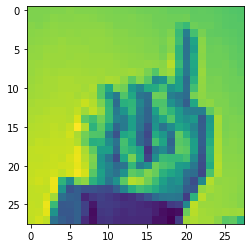

In [33]:
plt.imshow(X_train_reshape[9:10].squeeze())

In [34]:
y_train[9]

3

In [28]:
test = pd.read_csv('Dataset/sign_mnist_test.csv')
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [29]:
X_test = test.drop('label', axis=1).values
y_test = test['label'].values

In [30]:
X_test.shape

(7172, 784)

In [31]:
X_test = X_test.reshape(7172, 28, 28)

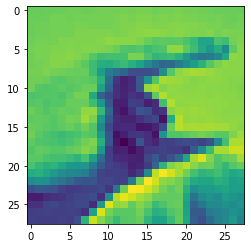

In [32]:
plt.imshow(X_test[0])

In [33]:
X_test_reshape = X_test.reshape((7172, 28, 28, 1))

In [34]:
X_test_norm = X_test_reshape / 255

In [11]:
model1 = tf.keras.models.load_model('model1.h5')

In [14]:
with tf.device('/CPU:0'):
    model1.evaluate(X_test_norm, y_test)

225/225 [==============================] - 2s 9ms/step - loss: 0.6806 - accuracy: 0.7996


### Model 1:
* accuracy: 0.805
* loss: 0.661

In [2]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 1024)              3

In [27]:
tf.random.set_seed(123)

model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

with tf.device('/CPU:0'):
    model2.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10


C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


858/858 [==============================] - 18s 21ms/step - loss: 2.9788 - accuracy: 0.1313
Epoch 2/10
858/858 [==============================] - 18s 21ms/step - loss: 1.7333 - accuracy: 0.4592
Epoch 3/10
858/858 [==============================] - 18s 21ms/step - loss: 0.7949 - accuracy: 0.7569
Epoch 4/10
858/858 [==============================] - 18s 21ms/step - loss: 0.3142 - accuracy: 0.9148
Epoch 5/10
858/858 [==============================] - 18s 21ms/step - loss: 0.1101 - accuracy: 0.9799
Epoch 6/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0424 - accuracy: 0.9964
Epoch 7/10
858/858 [==============================] - 18s 22ms/step - loss: 0.0205 - accuracy: 0.9996
Epoch 8/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0120 - accuracy: 1.0000
Epoch 9/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0082 - accuracy: 1.0000
Epoch 10/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0061 - accurac

In [35]:
model2.save('model2.h5')

In [75]:
model2 = tf.keras.models.load_model('model2.h5')

In [76]:
with tf.device('/CPU:0'):
    model2.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 6ms/step - loss: 0.3599 - accuracy: 0.9039


### Model 2
* accuracy: 0.904
* loss: 0.36

In [45]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

In [46]:
tf.random.set_seed(123)

model3.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

with tf.device('/CPU:0'):
    model3.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10
858/858 [==============================] - 21s 24ms/step - loss: 108.8009 - accuracy: 0.0419
Epoch 2/10
858/858 [==============================] - 20s 24ms/step - loss: 3.1959 - accuracy: 0.0428
Epoch 3/10
858/858 [==============================] - 21s 24ms/step - loss: 3.1976 - accuracy: 0.0421
Epoch 4/10
858/858 [==============================] - 21s 24ms/step - loss: 3.1952 - accuracy: 0.0431
Epoch 5/10
858/858 [==============================] - 22s 25ms/step - loss: 3.1964 - accuracy: 0.0430
Epoch 6/10
858/858 [==============================] - 22s 25ms/step - loss: 3.1952 - accuracy: 0.0443
Epoch 7/10
858/858 [==============================] - 23s 27ms/step - loss: 3.1966 - accuracy: 0.0444
Epoch 8/10
858/858 [==============================] - 23s 27ms/step - loss: 3.1970 - accuracy: 0.0426
Epoch 9/10
858/858 [==============================] - 22s 26ms/step - loss: 3.1965 - accuracy: 0.0432
Epoch 10/10
858/858 [==============================] - 22s 26ms/step - loss: 3.1

In [47]:
model3.save('model3.h5')

In [48]:
with tf.device('/CPU:0'):
    model3.evaluate(X_test_norm, y_test)

225/225 [==============================] - 2s 6ms/step - loss: 3.2455 - accuracy: 0.0343


### Model 3
* accuracy: 0.034
* loss: 3.2544

**Very Bad**

In [51]:
model4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_12 (Dense)            (None, 500)              

In [52]:
tf.random.set_seed(123)

model4.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

with tf.device('/CPU:0'):
    model4.fit(X_train_norm, y_train, epochs=10)

Epoch 1/10
858/858 [==============================] - 13s 15ms/step - loss: 3.1202 - accuracy: 0.0872
Epoch 2/10
858/858 [==============================] - 13s 16ms/step - loss: 2.1131 - accuracy: 0.3499
Epoch 3/10
858/858 [==============================] - 14s 16ms/step - loss: 1.1459 - accuracy: 0.6326
Epoch 4/10
858/858 [==============================] - 14s 16ms/step - loss: 0.5396 - accuracy: 0.8343
Epoch 5/10
858/858 [==============================] - 14s 16ms/step - loss: 0.2164 - accuracy: 0.9439
Epoch 6/10
858/858 [==============================] - 14s 16ms/step - loss: 0.0858 - accuracy: 0.9846
Epoch 7/10
858/858 [==============================] - 14s 16ms/step - loss: 0.0377 - accuracy: 0.9966
Epoch 8/10
858/858 [==============================] - 14s 16ms/step - loss: 0.0184 - accuracy: 0.9996
Epoch 9/10
858/858 [==============================] - 14s 16ms/step - loss: 0.0117 - accuracy: 0.9998
Epoch 10/10
858/858 [==============================] - 14s 16ms/step - loss: 0.008

In [53]:
model4.save('model4.h5')

In [54]:
model4 = tf.keras.models.load_model('model4.h5')

In [56]:
with tf.device('/CPU:0'):
    model4.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.4024 - accuracy: 0.8851


### Model 4
* accuracy: 0.885
* loss: 0.402

In [63]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 3200)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)             

In [64]:
tf.random.set_seed(123)

model5.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

with tf.device('/CPU:0'):
    model5.fit(X_train_norm, y_train, epochs=7)


Epoch 1/7


C:\Users\Dell\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


858/858 [==============================] - 18s 21ms/step - loss: 3.0450 - accuracy: 0.1148
Epoch 2/7
858/858 [==============================] - 18s 21ms/step - loss: 1.8681 - accuracy: 0.4236
Epoch 3/7
858/858 [==============================] - 18s 21ms/step - loss: 0.8861 - accuracy: 0.7265
Epoch 4/7
858/858 [==============================] - 18s 21ms/step - loss: 0.3629 - accuracy: 0.8986
Epoch 5/7
858/858 [==============================] - 18s 21ms/step - loss: 0.1305 - accuracy: 0.9736
Epoch 6/7
858/858 [==============================] - 19s 22ms/step - loss: 0.0511 - accuracy: 0.9941
Epoch 7/7
858/858 [==============================] - 19s 22ms/step - loss: 0.0230 - accuracy: 0.9994


In [65]:
model5.save('model5.h5')

In [66]:
model5 = tf.keras.models.load_model('model5.h5')

In [67]:
with tf.device('/CPU:0'):
    model5.evaluate(X_test_norm, y_test)

225/225 [==============================] - 2s 6ms/step - loss: 0.3771 - accuracy: 0.8844


### Model 5
* accuracy: 0.8844
* loss: 0.3771

In [70]:
model6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(750, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(25, activation='sigmoid')
])

model6.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 3200)              0         
                                                                 
 dense_24 (Dense)            (None, 750)              

In [71]:
tf.random.set_seed(123)

model6.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy']
             )

with tf.device('/CPU:0'):
    model6.fit(X_train_norm, y_train, epochs=10)


Epoch 1/10
858/858 [==============================] - 16s 18ms/step - loss: 3.0626 - accuracy: 0.1062
Epoch 2/10
858/858 [==============================] - 16s 19ms/step - loss: 1.9473 - accuracy: 0.3920
Epoch 3/10
858/858 [==============================] - 16s 19ms/step - loss: 1.0495 - accuracy: 0.6703
Epoch 4/10
858/858 [==============================] - 16s 19ms/step - loss: 0.4749 - accuracy: 0.8619
Epoch 5/10
858/858 [==============================] - 16s 19ms/step - loss: 0.1798 - accuracy: 0.9575
Epoch 6/10
858/858 [==============================] - 16s 19ms/step - loss: 0.0688 - accuracy: 0.9901
Epoch 7/10
858/858 [==============================] - 16s 19ms/step - loss: 0.0310 - accuracy: 0.9977
Epoch 8/10
858/858 [==============================] - 17s 19ms/step - loss: 0.0157 - accuracy: 0.9997
Epoch 9/10
858/858 [==============================] - 17s 19ms/step - loss: 0.0100 - accuracy: 0.9999
Epoch 10/10
858/858 [==============================] - 17s 19ms/step - loss: 0.007

In [72]:
model6.save('model6.h5')

In [73]:
model6 = tf.keras.models.load_model('model6.h5')

In [74]:
with tf.device('/CPU:0'):
    model6.evaluate(X_test_norm, y_test)

225/225 [==============================] - 1s 5ms/step - loss: 0.4279 - accuracy: 0.8885


### Checking Precision and Recall

* **Precision** = `TP / (TP + FP)`
* **Recall** = `TP / (TP + FN)`

In [79]:
y_test

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [83]:
prediction = model2.predict(X_test_norm)

225/225 [==============================] - 1s 6ms/step


In [93]:
results = np.array([], dtype='int32')
for pred in prediction:
    p = np.argmax(pred)
    results = np.append(results, p)

In [94]:
results

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [97]:
y_test.shape

(7172,)

In [98]:
results.shape

(7172,)

In [118]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

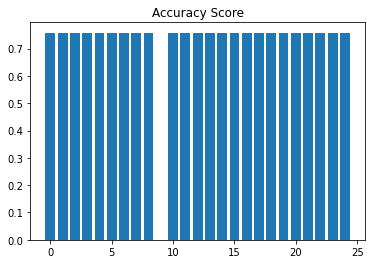

In [120]:
accuracy = accuracy_score(y_test, results)
plt.bar(target_values, accuracy)
plt.title('Accuracy Score')
plt.show()

In [121]:
accuracy

0.7582264361405465

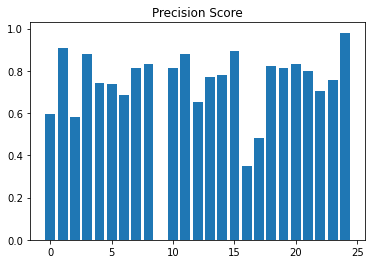

In [114]:
precision = precision_score(y_test, results, average=None)
plt.bar(target_values, precision)
plt.title('Precision Score')
plt.show()

In [115]:
np.average(precision)

0.7551240482155954

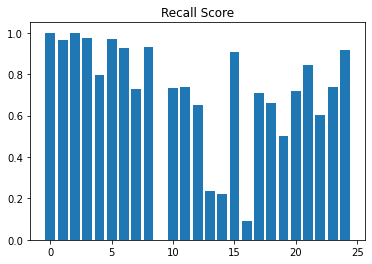

In [116]:
recall = recall_score(y_test, results, average=None)
plt.bar(target_values, recall)
plt.title('Recall Score')
plt.show()

In [117]:
np.average(recall)

0.7307381672952517

In [132]:
values = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])
values.shape

(26,)

In [158]:
target_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [133]:
values[target_values]

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y'], dtype='<U1')

In [123]:
target_values.shape

(24,)

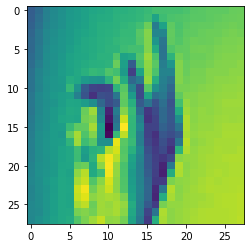

In [196]:
i = 157
plt.imshow(X_test[i])

In [197]:
values[y_test[i]], y_test[i]

('K', 10)

In [198]:
values[np.argmax(model2.predict(X_test_norm[i:i+1]))]

1/1 [==============================] - 0s 75ms/step


'K'

In [195]:
np.where(y_test == 10)[0][7]

157

In [199]:
vid = cv2.VideoCapture(0)
while(True):
    ret, frame = vid.read()
    cv2.imshow('frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
vid.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 